In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

Зададим начальные условия для трубы

Text(0, 0.5, 'A(x)')

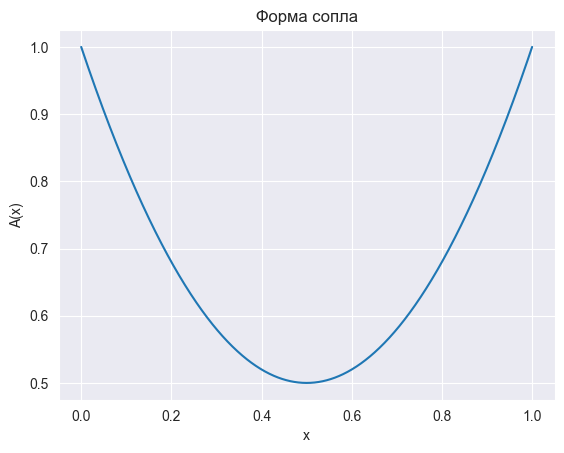

In [8]:
N = 1000
A_0 = 0.5
X_0 = 0.5
x = np.linspace(0, 1, N)
A = lambda x: A_0 + (1 - A_0)*(1- x/X_0)**2
a = A(x)
plt.title('Форма сопла')
plt.plot(x, a)
plt.xlabel('x')
plt.ylabel('A(x)')


In [19]:

Gam = 1.4
Gm1 = Gam -1
XL = 1
Dx = XL/(N-1)
CFL = 0.8
TOL = 1e-4
Xmin = 0. * XL
Amin = 0.5

In [20]:
# Left and right boundary values
RL = 1
UL = 1.0237498
PL = 8

# RR = 0.8835893
# UR = 1.1586268
# PR = 7.0315580
RR = 0.1933880
UR = 5.2937898
PR = 0.8018469

In [21]:
Q = np.zeros((3, N))
F = np.zeros((3, N))
QP = np.zeros((3, N))
QPn = np.zeros((3, N))
Qn = np.zeros((3, N))
S = np.zeros(3)
Rho = np.zeros(N)

for i in range(0, N):
    C_2 = x[i]/XL
    C_1 = 1 - C_2
    R = C_1 * RL + C_2 * RR
    U = C_1 * UL + C_2 * UR
    P = C_1 * PL + C_2 * PR
    Q[0][i] = R
    Q[1][i] = R * U
    Q[2][i] = P / Gm1 + 0.5 * R * U * U

T = 0
NRec = 0
NStep = 0
Eps = 1


<img src="Lax_task2.png" alt="drawing" width="700"/>

In [22]:
def flux(Q,QP,F):
    F[0][:] = Q[1][:]
    F[1][:] = Q[1][:] * QP[1][:] + QP[2][:]
    F[2][:] = (Q[2][:] + QP[2][:]) * QP[1][:]
    return F

def Cons2Prim(Q,QP):
    QP[0][:] = Q[0][:]
    QP[1][:] = Q[1][:]/QP[0][:]
    QP[2][:] = Gm1*(Q[2][:]-0.5*QP[0][:])*QP[1][:]*QP[1][:]
    return QP

Cons2Prim(Q, QP)

for E in range(0, N):

    Vmax = 0
    for i in range(0, N):
        c = np.sqrt(Gam*QP[2][i]/Q[0][i])
        Vmax = max(Eps, abs(QP[1][i])+c)
#Calculates available time step

    DT = CFL*Dx/Vmax
    DtDx = 0.5 * DT / Dx

#Predictor step
    for i in range(0, N):
        Rho[i] = QP[0][i]

    flux(Q,QP,F)

    for i in range(0, N):

        PS = 0.5*(QP[2][i-1]+QP[2][i])
        AS = 0.5*(a[i-1]+a[i])
        dAdx = a[i]-a[i-1]
        S[0] = 0
        S[1] = PS*dAdx
        S[2] = 0
        for l in range(0, 3):
            Qn[l][i] = (0.5*(a[i-1]*Q[l][i-1]+a[i]*Q[l][i])+ DtDx*(a[i-1]*F[l][i-1]-a[i]*F[l][i]+S[l]))/AS

    Cons2Prim(Qn,QPn)

#Corrector step
    flux(Qn,QPn,F)

    for i in range(0, N-1):

        PS = 0.5*(QPn[2][i]+QPn[2][i+1])
        A1 = 0.5*(a[i-1]+a[i])
        A2 = 0.5*(a[i]+a[i+1])
        dAdx = 0.5*(a[i+1]-a[i-1])
        S[0] = 0
        S[1] = PS*dAdx
        S[2] = 0
        for l in range(0, 3):
            Q[l][i] = (0.5*(A1*Qn[l][i]+A2*Qn[l][i+1]) + DtDx*(A1*F[l][i]-A2*F[l][i+1]+S[l]))/a[i]


    Cons2Prim(Q, QP)

    Eps = 0
    for i in range(0, N):
        Eps = max(Eps, abs((QP[0][i] - Rho[i])/Rho[i])/DT)

    T = T + DT


Q_1 = np.zeros(N)
Q_2 = np.zeros(N)
Q_3 = np.zeros(N)

for j in range(0, N):
    Q_1[j] = Q[0][j]
    Q_2[j] = Q[1][j]
    Q_3[j] = Q[2][j]


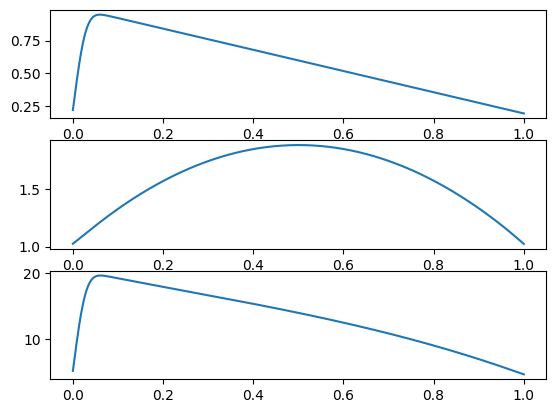

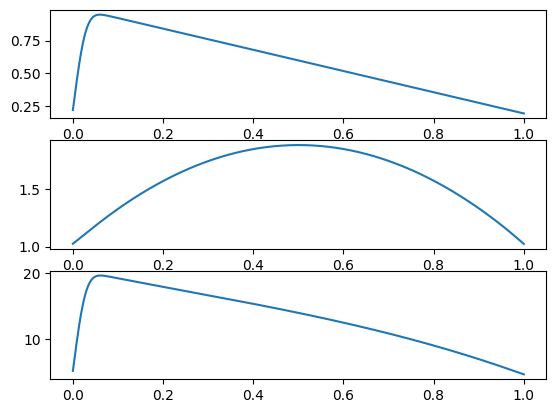

In [23]:
plt.subplot(311)
plt.plot(x, Q_1)
plt.subplot(312)
plt.plot(x, Q_2)
plt.subplot(313)
plt.plot(x, Q_3)